# Population gene expression

In [60]:
# library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read population excel sheet
pop_df = pd.read_excel("20130606_sample_info.xlsx")
pop_df.head(2)

/Users/samiaislam/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Sample,Family ID,Population,Population Description,Gender,Relationship,Unexpected Parent/Child,Non Paternity,Siblings,Grandparents,Avuncular,Half Siblings,Unknown Second Order,Third Order,Other Comments
0,HG00096,HG00096,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HG00097,HG00097,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# unique populations
pop_list = pop_df["Population"].unique()
pop_list

array(['GBR', 'FIN', 'CHS', 'PUR', 'CDX', 'CLM', 'IBS', 'PEL', 'PJL',
       'KHV', 'ACB', 'GWD', 'ESN', 'BEB', 'MSL', 'STU', 'ITU', 'CEU',
       'YRI', 'CHB', 'JPT', 'LWK', 'ASW', 'MXL', 'TSI', 'GIH'],
      dtype=object)

In [4]:
# number of populations
len(pop_list)

26

In [5]:
# number of samples per population
pop_df.groupby('Population')['Sample'].count()

Population
ACB    123
ASW    112
BEB    144
CDX    109
CEU    183
CHB    108
CHS    171
CLM    148
ESN    173
FIN    105
GBR    107
GIH    113
GWD    180
IBS    162
ITU    118
JPT    105
KHV    124
LWK    116
MSL    128
MXL    107
PEL    130
PJL    158
PUR    150
STU    128
TSI    112
YRI    186
Name: Sample, dtype: int64

In [63]:
# read FPKM table
df_fpkm = pd.read_table('fpkm.txt')
df_fpkm.head(1)

,Gene ID,Gene Name,"British, HG00096","British, HG00097","British, HG00099","British, HG00100","British, HG00101","British, HG00102","British, HG00103","British, HG00104",...,"Yoruba, NA19214","Yoruba, NA19222","Yoruba, NA19223","Yoruba, NA19225","Yoruba, NA19235","Yoruba, NA19236","Yoruba, NA19247","Yoruba, NA19248","Yoruba, NA19256","Yoruba, NA19257"
0,ENSG00000000003,TSPAN6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,...,NaN,NaN,0.5,0.1,0.1,0.1,0.1,0.1,NaN,NaN


In [64]:
# count how many individuals
df_fpkm.shape[1]

464

In [65]:
df_fpkm.columns

Index(['Gene ID', 'Gene Name', 'British, HG00096', 'British, HG00097',
       'British, HG00099', 'British, HG00100', 'British, HG00101',
       'British, HG00102', 'British, HG00103', 'British, HG00104',
       ...
       'Yoruba, NA19214', 'Yoruba, NA19222', 'Yoruba, NA19223',
       'Yoruba, NA19225', 'Yoruba, NA19235', 'Yoruba, NA19236',
       'Yoruba, NA19247', 'Yoruba, NA19248', 'Yoruba, NA19256',
       'Yoruba, NA19257'],
      dtype='object', length=464)

In [66]:
# copy dataframe so that changes can be made without losing the original dataframe
df_tmp = df_fpkm.copy()

In [67]:
# for each population in the FPTM (gene expression) file, find average
# gene expression. But I don't know which populations are included in the gene
# expression file. The way I'm doing it is I'm looking at the dataframe and am picking 
# one population at a time. I'm finding all the columns belonging to that
# population and then finding the average across each row (so, for each gene). Once 
# I have the average, I remove that population from the copy of the dataframe (don't modify
# the original dataframe), and look at the next population. Repeat the above steps.

In [68]:
# get average gene expression for british population
# extract columns from british population
british_columns = ['Gene Name'] + [col for col in df_fpkm.columns if col.startswith('British')]
british_df = df_fpkm[british_columns]
# find average
british_avg = british_df.mean(axis=1)
print(british_avg)

0         0.122857
1         0.100000
2        48.521277
3         3.648936
4         4.755319
           ...    
48968          NaN
48969     0.100000
48970     0.100000
48971          NaN
48972     0.128000
Length: 48973, dtype: float64


/var/folders/d2/qsznt031653ftxspm5w68v0c0000gn/T/ipykernel_73721/454393048.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  british_avg = british_df.mean(axis=1)


In [69]:
# save the average of the british population for BMPR2 gene
# in a list
bmpr2_index = british_df[british_df['Gene Name'] \
                           == 'BMPR2'].index[0]
bmpr2_avg_list = [british_avg[bmpr2_index]]
smad9_index = british_df[british_df['Gene Name'] \
                           == 'SMAD9'].index[0]
smad9_avg_list = [british_avg[smad9_index]]
acvrl1_index = british_df[british_df['Gene Name'] \
                           == 'ACVRL1'].index[0]
acvrl1_avg_list = [british_avg[acvrl1_index]]
cav1_index = british_df[british_df['Gene Name'] \
                           == 'CAV1'].index[0]
cav1_avg_list = [british_avg[cav1_index]]
eng_index = british_df[british_df['Gene Name'] \
                           == 'ENG'].index[0]
eng_avg_list = [british_avg[eng_index]]
print(bmpr2_avg_list, smad9_avg_list, acvrl1_avg_list, \
      cav1_avg_list, eng_avg_list)

[7.24468085106383] [0.2602150537634409] [0.1] [2.515957446808511] [5.617021276595745]


In [70]:
# Remove the 'British' columns from the copy of the dataframe
df_tmp = df_tmp.drop(columns=british_columns)
df_tmp.head(1)

,Gene ID,"Finland, HG00171","Finland, HG00173","Finland, HG00174","Finland, HG00176","Finland, HG00177","Finland, HG00178","Finland, HG00179","Finland, HG00180","Finland, HG00181",...,"Yoruba, NA19214","Yoruba, NA19222","Yoruba, NA19223","Yoruba, NA19225","Yoruba, NA19235","Yoruba, NA19236","Yoruba, NA19247","Yoruba, NA19248","Yoruba, NA19256","Yoruba, NA19257"
0,ENSG00000000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5,0.1,0.1,0.1,0.1,0.1,NaN,NaN


In [71]:
# Finland population
# extract columns from finnish population
fin_columns = ['Gene Name'] + [col for col in df_fpkm.columns if col.startswith('Fin')]
fin_df = df_fpkm[fin_columns]
fin_avg = fin_df.mean(axis=1)
print(fin_avg)

0         0.115789
1         0.100000
2        48.242105
3         3.326316
4         4.789474
           ...    
48968     0.100000
48969     0.100000
48970          NaN
48971     0.100000
48972     0.120000
Length: 48973, dtype: float64


/var/folders/d2/qsznt031653ftxspm5w68v0c0000gn/T/ipykernel_73721/1569150367.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fin_avg = fin_df.mean(axis=1)


In [72]:
# save the average of the finland population for BMPR2 gene
# in a list
bmpr2_index = fin_df[fin_df['Gene Name'] \
                           == 'BMPR2'].index[0]
bmpr2_avg_list.append(fin_avg[bmpr2_index])
smad9_index = fin_df[fin_df['Gene Name'] \
                           == 'SMAD9'].index[0]
smad9_avg_list.append(fin_avg[smad9_index])
acvrl1_index = fin_df[fin_df['Gene Name'] \
                           == 'ACVRL1'].index[0]
acvrl1_avg_list.append(fin_avg[acvrl1_index])
cav1_index = fin_df[fin_df['Gene Name'] \
                           == 'CAV1'].index[0]
cav1_avg_list.append(fin_avg[cav1_index])
eng_index = fin_df[fin_df['Gene Name'] \
                           == 'ENG'].index[0]
eng_avg_list.append(fin_avg[eng_index])
print(bmpr2_avg_list, smad9_avg_list, acvrl1_avg_list, \
     cav1_avg_list, eng_avg_list)

[7.24468085106383, 7.326315789473684] [0.2602150537634409, 0.22553191489361704] [0.1, 0.10000000000000002] [2.515957446808511, 4.051578947368421] [5.617021276595745, 4.188421052631579]


In [73]:
# Remove the 'Finland' columns from the copy of the dataframe
df_tmp = df_tmp.drop(columns=fin_columns[1:])
df_tmp.head(1)

,Gene ID,"Tuscan, NA20502","Tuscan, NA20503","Tuscan, NA20504","Tuscan, NA20505","Tuscan, NA20506","Tuscan, NA20507","Tuscan, NA20508","Tuscan, NA20509","Tuscan, NA20510",...,"Yoruba, NA19214","Yoruba, NA19222","Yoruba, NA19223","Yoruba, NA19225","Yoruba, NA19235","Yoruba, NA19236","Yoruba, NA19247","Yoruba, NA19248","Yoruba, NA19256","Yoruba, NA19257"
0,ENSG00000000003,NaN,NaN,0.1,0.3,NaN,NaN,NaN,NaN,0.1,...,NaN,NaN,0.5,0.1,0.1,0.1,0.1,0.1,NaN,NaN


In [74]:
# Tuscan population
tsi_columns = ['Gene Name'] + [col for col in df_fpkm.columns if col.startswith('Tusc')]
tsi_df = df_fpkm[tsi_columns]
tsi_avg = tsi_df.mean(axis=1)
print(tsi_avg)

0         0.125000
1              NaN
2        49.763441
3         3.322581
4         5.021505
           ...    
48968          NaN
48969     0.100000
48970          NaN
48971          NaN
48972     0.108000
Length: 48973, dtype: float64


/var/folders/d2/qsznt031653ftxspm5w68v0c0000gn/T/ipykernel_73721/746920098.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tsi_avg = tsi_df.mean(axis=1)


In [75]:
# save the average of the Tuscan population for BMPR2 gene
# in a list
bmpr2_index = tsi_df[tsi_df['Gene Name'] \
                           == 'BMPR2'].index[0]
bmpr2_avg_list.append(tsi_avg[bmpr2_index])
smad9_index = tsi_df[tsi_df['Gene Name'] \
                           == 'SMAD9'].index[0]
smad9_avg_list.append(tsi_avg[smad9_index])
acvrl1_index = tsi_df[tsi_df['Gene Name'] \
                           == 'ACVRL1'].index[0]
acvrl1_avg_list.append(tsi_avg[acvrl1_index])
cav1_index = tsi_df[tsi_df['Gene Name'] \
                           == 'CAV1'].index[0]
cav1_avg_list.append(tsi_avg[cav1_index])
eng_index = tsi_df[tsi_df['Gene Name'] \
                           == 'ENG'].index[0]
eng_avg_list.append(tsi_avg[eng_index])
print(bmpr2_avg_list, smad9_avg_list, acvrl1_avg_list, \
     cav1_avg_list, eng_avg_list)

[7.24468085106383, 7.326315789473684, 6.408602150537634] [0.2602150537634409, 0.22553191489361704, 0.24395604395604398] [0.1, 0.10000000000000002, 0.125] [2.515957446808511, 4.051578947368421, 2.6301075268817207] [5.617021276595745, 4.188421052631579, 4.95483870967742]


In [76]:
# Remove the 'Tuscan' columns from the copy of the dataframe
df_tmp = df_tmp.drop(columns=tsi_columns[1:])
df_tmp.head(1)

,Gene ID,"Utah, NA06984","Utah, NA06985","Utah, NA06986","Utah, NA06989","Utah, NA06994","Utah, NA07037","Utah, NA07048","Utah, NA07051","Utah, NA07056",...,"Yoruba, NA19214","Yoruba, NA19222","Yoruba, NA19223","Yoruba, NA19225","Yoruba, NA19235","Yoruba, NA19236","Yoruba, NA19247","Yoruba, NA19248","Yoruba, NA19256","Yoruba, NA19257"
0,ENSG00000000003,0.1,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5,0.1,0.1,0.1,0.1,0.1,NaN,NaN


In [78]:
# Utah population
ceu_columns = ['Gene Name'] + [col for col in df_fpkm.columns if col.startswith('Utah')]
ceu_df = df_fpkm[ceu_columns]
ceu_avg = ceu_df.mean(axis=1)
print(ceu_avg)

0         0.137500
1         0.100000
2        45.648352
3         2.989011
4         4.747253
           ...    
48968     0.100000
48969          NaN
48970          NaN
48971     0.100000
48972     0.130000
Length: 48973, dtype: float64


/var/folders/d2/qsznt031653ftxspm5w68v0c0000gn/T/ipykernel_73721/3377169472.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ceu_avg = ceu_df.mean(axis=1)


In [79]:
# save the average of the Tuscan population for BMPR2 gene
# in a list
bmpr2_index = ceu_df[ceu_df['Gene Name'] \
                           == 'BMPR2'].index[0]
bmpr2_avg_list.append(ceu_avg[bmpr2_index])
smad9_index = ceu_df[ceu_df['Gene Name'] \
                           == 'SMAD9'].index[0]
smad9_avg_list.append(ceu_avg[smad9_index])
acvrl1_index = ceu_df[ceu_df['Gene Name'] \
                           == 'ACVRL1'].index[0]
acvrl1_avg_list.append(ceu_avg[acvrl1_index])
cav1_index = ceu_df[ceu_df['Gene Name'] \
                           == 'CAV1'].index[0]
cav1_avg_list.append(ceu_avg[cav1_index])
eng_index = ceu_df[ceu_df['Gene Name'] \
                           == 'ENG'].index[0]
eng_avg_list.append(ceu_avg[eng_index])
print(bmpr2_avg_list, smad9_avg_list, acvrl1_avg_list, \
     cav1_avg_list, eng_avg_list)

[7.24468085106383, 7.326315789473684, 6.408602150537634, 6.824175824175824] [0.2602150537634409, 0.22553191489361704, 0.24395604395604398, 0.2923076923076923] [0.1, 0.10000000000000002, 0.125, 0.11875000000000002] [2.515957446808511, 4.051578947368421, 2.6301075268817207, 3.3472527472527474] [5.617021276595745, 4.188421052631579, 4.95483870967742, 3.5340659340659344]


In [80]:
# Remove the 'Utah' columns from the copy of the dataframe
df_tmp = df_tmp.drop(columns=ceu_columns[1:])
df_tmp.head(1)

,Gene ID,"Yoruba, NA18486","Yoruba, NA18487","Yoruba, NA18488","Yoruba, NA18489","Yoruba, NA18498","Yoruba, NA18499","Yoruba, NA18502","Yoruba, NA18505","Yoruba, NA18508",...,"Yoruba, NA19214","Yoruba, NA19222","Yoruba, NA19223","Yoruba, NA19225","Yoruba, NA19235","Yoruba, NA19236","Yoruba, NA19247","Yoruba, NA19248","Yoruba, NA19256","Yoruba, NA19257"
0,ENSG00000000003,NaN,NaN,NaN,0.1,0.4,NaN,NaN,0.3,NaN,...,NaN,NaN,0.5,0.1,0.1,0.1,0.1,0.1,NaN,NaN


In [81]:
# Yoruba population
yri_columns = ['Gene Name'] + [col for col in df_fpkm.columns if col.startswith('Yoruba')]
yri_df = df_fpkm[yri_columns]
yri_avg = yri_df.mean(axis=1)
print(yri_avg)

0         0.188372
1         0.100000
2        42.348315
3         3.280899
4         4.842697
           ...    
48968     0.100000
48969     0.100000
48970          NaN
48971     0.100000
48972     0.100000
Length: 48973, dtype: float64


/var/folders/d2/qsznt031653ftxspm5w68v0c0000gn/T/ipykernel_73721/249252503.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  yri_avg = yri_df.mean(axis=1)


In [82]:
# save the average of the Tuscan population for BMPR2 gene
# in a list
bmpr2_index = yri_df[yri_df['Gene Name'] \
                           == 'BMPR2'].index[0]
bmpr2_avg_list.append(yri_avg[bmpr2_index])
smad9_index = yri_df[yri_df['Gene Name'] \
                           == 'SMAD9'].index[0]
smad9_avg_list.append(yri_avg[smad9_index])
acvrl1_index = yri_df[yri_df['Gene Name'] \
                           == 'ACVRL1'].index[0]
acvrl1_avg_list.append(yri_avg[acvrl1_index])
cav1_index = yri_df[yri_df['Gene Name'] \
                           == 'CAV1'].index[0]
cav1_avg_list.append(yri_avg[cav1_index])
eng_index = yri_df[yri_df['Gene Name'] \
                           == 'ENG'].index[0]
eng_avg_list.append(yri_avg[eng_index])
print(bmpr2_avg_list, smad9_avg_list, acvrl1_avg_list, \
     cav1_avg_list, eng_avg_list)

[7.24468085106383, 7.326315789473684, 6.408602150537634, 6.824175824175824, 7.617977528089888] [0.2602150537634409, 0.22553191489361704, 0.24395604395604398, 0.2923076923076923, 0.22168674698795182] [0.1, 0.10000000000000002, 0.125, 0.11875000000000002, 0.13333333333333333] [2.515957446808511, 4.051578947368421, 2.6301075268817207, 3.3472527472527474, 1.7224719101123598] [5.617021276595745, 4.188421052631579, 4.95483870967742, 3.5340659340659344, 4.742696629213484]


In [83]:
# Remove the 'Yoruba' columns from the copy of the dataframe
df_tmp = df_tmp.drop(columns=yri_columns[1:])
df_tmp.head(1)

,Gene ID
0,ENSG00000000003


In [84]:
# create a list for populations for which we have 
# gene expressions
pop_list = ['British', 'Finland', 'Tuscan', 'Utah', 'Yoruba']


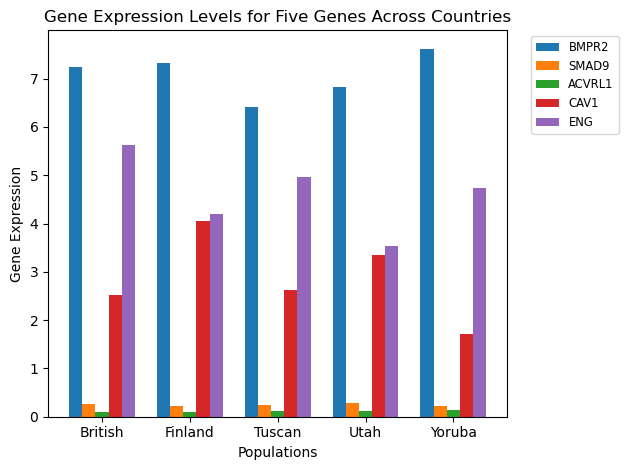

In [87]:
bar_width = 0.15

# Create an index array for the x-axis positions
x = np.arange(len(pop_list))

# Create the bar plot for Gene 1
plt.bar(x - bar_width * 2, bmpr2_avg_list, width=bar_width, label='BMPR2')

# Create the bar plot for Gene 2
plt.bar(x - bar_width, smad9_avg_list, width=bar_width, label='SMAD9')

# Create the bar plot for Gene 3
plt.bar(x, acvrl1_avg_list, width=bar_width, label='ACVRL1')

# Create the bar plot for Gene 4
plt.bar(x + bar_width, cav1_avg_list, width=bar_width, label='CAV1')

# Create the bar plot for Gene 5
plt.bar(x + bar_width * 2, eng_avg_list, width=bar_width, label='ENG')

# Add country names as x-axis labels
plt.xticks(np.arange(len(pop_list)), pop_list)

# Add labels and title
plt.xlabel('Populations')
plt.ylabel('Gene Expression')
plt.title('Gene Expression Levels for Five Genes Across Countries')

# Show the legend
plt.legend(fontsize='small', bbox_to_anchor=(1.04, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping of labels
plt.show()

# Gender gene expression

In [88]:
# In order to find variation between genders, I first have to find the gender
# of each individual. The column names in the gene expression file has the country
# followed by comma and space, and then the individual's ID. This ID matches the
# Family ID of the individual in the population spreadsheet, which also has the 
# gender of the individual. So I am looping through each column of the gene 
# expression dataframe, then I split the column name on comma, and strip trailing and 
# preceding whitespaces. Now I have the individual's Family ID that I can cross check
# in the population dataframe. I extract the gender of that individual and add an M
# or an F to the ID and rename the column based on gender, instead of country. Now
# I have column names which have gender, followed by comma and space, and then ID. 
# I repeat what I did in the previous step where I was finding average gene expression
# based on population. This time, I find it based on whether the column name begins with
# an M or an F. I find the average for each gender and then find the absolute difference
# between the two. 

In [89]:
# copy original dataframes so that they don't get modified
df_fpkm_new = df_fpkm.copy()
df_new = pop_df.copy()

In [90]:
# Extract 'ID' from 'Country,ID' column in df_fptm and just
# extract ID part
# Loop through each column name i
for col in df_fpkm_new.columns[2:]:
    idstr = col.split(',')[1].strip()
    if (pop_df.loc[pop_df['Sample'] == idstr, 'Gender'].values[0]) == 'male':
        newcol = 'M'+', '+idstr
    elif (pop_df.loc[pop_df['Sample'] == idstr, 'Gender'].values[0]) == 'female':
        newcol = 'F'+', '+idstr
    df_fpkm_new.rename(columns={col: newcol}, inplace=True)
df_fpkm_new.head(1)

,Gene ID,Gene Name,"M, HG00096","F, HG00097","F, HG00099","F, HG00100","M, HG00101","F, HG00102","M, HG00103","F, HG00104",...,"F, NA19214","F, NA19222","M, NA19223","F, NA19225","F, NA19235","M, NA19236","F, NA19247","M, NA19248","M, NA19256","F, NA19257"
0,ENSG00000000003,TSPAN6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,...,NaN,NaN,0.5,0.1,0.1,0.1,0.1,0.1,NaN,NaN


In [91]:
# male population
male_columns = ['Gene Name'] + [col for col in df_fpkm_new.columns if col.startswith('M,')]
male_df = df_fpkm_new[male_columns]
male_avg = male_df.mean(axis=1)
print(male_avg)

0         0.154687
1         0.100000
2        47.550926
3         3.416667
4         4.962963
           ...    
48968          NaN
48969     0.100000
48970          NaN
48971     0.100000
48972     0.121739
Length: 48973, dtype: float64


/var/folders/d2/qsznt031653ftxspm5w68v0c0000gn/T/ipykernel_73721/2599165972.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  male_avg = male_df.mean(axis=1)


In [92]:
# gene expression list
bmpr2_index = male_df[male_df['Gene Name'] \
                           == 'BMPR2'].index[0]
bmpr2_list = [male_avg[bmpr2_index]]
smad9_index = male_df[male_df['Gene Name'] \
                           == 'SMAD9'].index[0]
smad9_list = [male_avg[smad9_index]]
acvrl1_index = male_df[male_df['Gene Name'] \
                           == 'ACVRL1'].index[0]
acvrl1_list = [male_avg[acvrl1_index]]
cav1_index = male_df[male_df['Gene Name'] \
                           == 'CAV1'].index[0]
cav1_list = [male_avg[cav1_index]]
eng_index = male_df[male_df['Gene Name'] \
                           == 'ENG'].index[0]
eng_list = [male_avg[eng_index]]
print(bmpr2_list, smad9_list, acvrl1_list, cav1_list, eng_list)

[7.175925925925926] [0.23915094339622642] [0.11555555555555556] [2.588888888888889] [4.575]


In [93]:
# female population
female_columns = ['Gene Name'] + [col for col in df_fpkm_new.columns if col.startswith('F,')]
female_df = df_fpkm_new[female_columns]
female_avg = female_df.mean(axis=1)
print(female_avg)

0         0.135065
1         0.100000
2        46.439024
3         3.227642
4         4.715447
           ...    
48968     0.100000
48969     0.100000
48970     0.100000
48971     0.100000
48972     0.114493
Length: 48973, dtype: float64


/var/folders/d2/qsznt031653ftxspm5w68v0c0000gn/T/ipykernel_73721/2109144614.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  female_avg = female_df.mean(axis=1)


In [94]:
# gene expression list
bmpr2_index = female_df[female_df['Gene Name'] \
                           == 'BMPR2'].index[0]
bmpr2_list.append(female_avg[bmpr2_index])
smad9_index = female_df[female_df['Gene Name'] \
                           == 'SMAD9'].index[0]
smad9_list.append(female_avg[smad9_index])
acvrl1_index = female_df[female_df['Gene Name'] \
                           == 'ACVRL1'].index[0]
acvrl1_list.append(female_avg[acvrl1_index])
cav1_index = female_df[female_df['Gene Name'] \
                           == 'CAV1'].index[0]
cav1_list.append(female_avg[cav1_index])
eng_index = female_df[female_df['Gene Name'] \
                           == 'ENG'].index[0]
eng_list.append(female_avg[eng_index])
print(bmpr2_list, smad9_list, acvrl1_list, cav1_list, eng_list)

[7.175925925925926, 7.0] [0.23915094339622642, 0.2579166666666667] [0.11555555555555556, 0.11538461538461539] [2.588888888888889, 3.1085365853658535] [4.575, 4.6430894308943085]


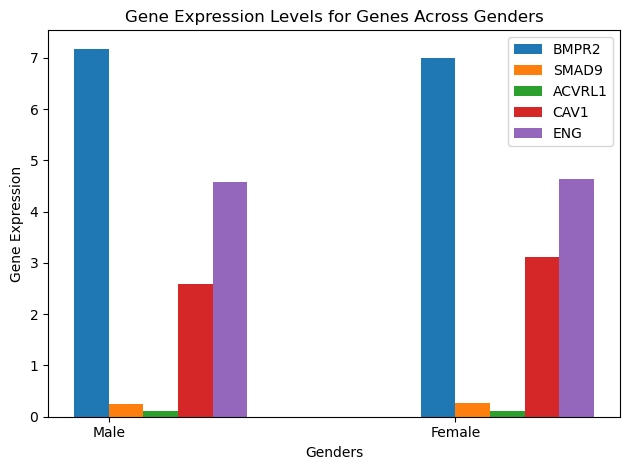

In [96]:
genders = ['Male', 'Female']

# Set the width of the bars
bar_width = 0.1

# Create an index array for the x-axis positions
x = np.arange(len(genders))

# Create the grouped bar plot for each gene's expression
plt.bar(x - bar_width / 2, bmpr2_list, width=bar_width, label='BMPR2')
plt.bar(x + bar_width / 2, smad9_list, width=bar_width, label='SMAD9')
plt.bar(x + bar_width * 1.5, acvrl1_list, width=bar_width, label='ACVRL1')
plt.bar(x + bar_width * 2.5, cav1_list, width=bar_width, label='CAV1')
plt.bar(x + bar_width * 3.5, eng_list, width=bar_width, label='ENG')

# Add gender names as x-axis labels
plt.xticks(np.arange(len(genders)), genders)

# Add labels and title
plt.xlabel('Genders')
plt.ylabel('Gene Expression')
plt.title('Gene Expression Levels for Genes Across Genders')

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping of labels
plt.show()